Example showing how to calibrate position switched data using vector and scalar approaches.

In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.convolution import convolve
from astropy.convolution import Gaussian1DKernel

from groundhog import datared
from groundhog import sd_fits_io

In [3]:
# Data selection parameters.
scan = 6
ifnum = 0
plnum = 1
intnum = None
sdfits_file = '../groundhog/tests/data/TGBT20A_506_01.raw.vegas.A.fits'

We load the SDFITS file containing position switched observations and flag 50% of the channels at the edges (25% on each edge).

In [4]:
sdfits = sd_fits_io.read_sdfits(sdfits_file)
sdfits.remove_edge_chans(frac=0.5)

Next, we calibrate the position switched scans using the scalar, `method='gbtidl'`, and vector, `method='vector'`, approaches.

In [5]:
tsou_s = datared.get_ps(sdfits, scan, ifnum=ifnum, intnum=intnum, plnum=plnum, method='gbtidl')
tsou_v = datared.get_ps(sdfits, scan, ifnum=ifnum, intnum=intnum, plnum=plnum, method='vector', avgf_min=1e4)

We extract the frequency information for our scan.

In [6]:
scan = sdfits.get_scans(scan, ifnum=ifnum, intnum=intnum, plnum=plnum)
freq = scan.freq[0]

And smooth the spectra using a Gaussian kernel with $\sigma=10$ channels.

In [7]:
gauss = Gaussian1DKernel(stddev=10)
tsou_s_smo = convolve(tsou_s, gauss)
tsou_v_smo = convolve(tsou_v, gauss)

Finally, we plot and compare the results from the two methods.

<IPython.core.display.Javascript object>


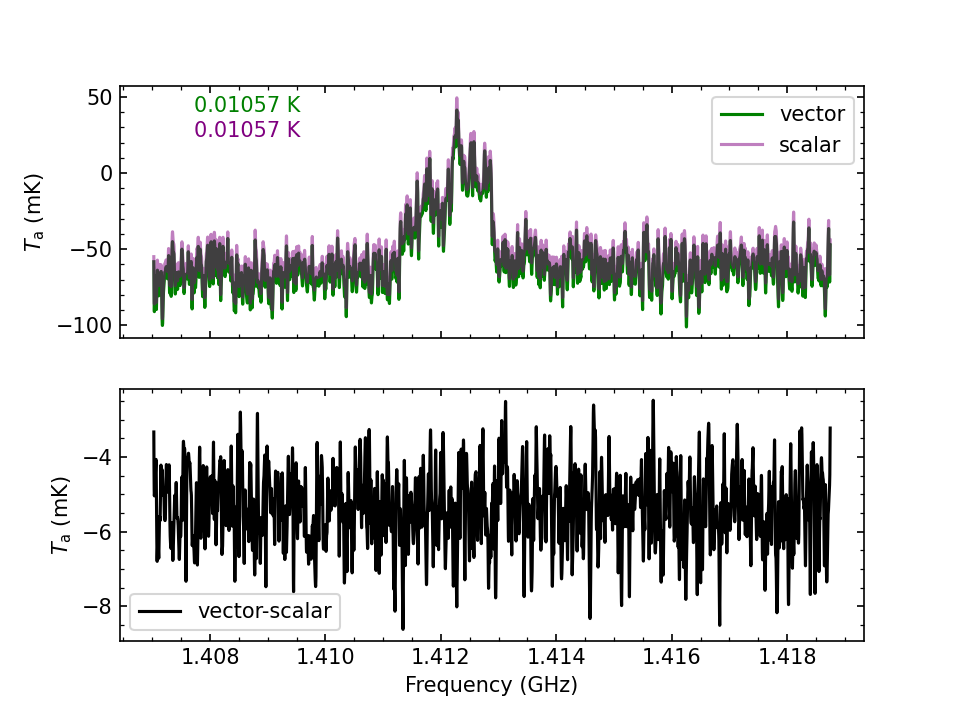

In [8]:
fig = plt.figure(dpi=150)

ax = fig.add_subplot(211)
ax.plot(freq.to('GHz'), tsou_v_smo*1e3, c='g', label='vector')
ax.plot(freq.to('GHz'), tsou_s_smo*1e3, c='purple', alpha=0.5, label='scalar')
ax.set_ylabel(r'$T_{\rm{a}}$ (mK)')
ax.text(0.1, 0.9, '{0:.5f} K'.format(tsou_v_smo[:8000].std()), transform=ax.transAxes, c='g')
ax.text(0.1, 0.8, '{0:.5f} K'.format(tsou_s_smo[:8000].std()), transform=ax.transAxes, c='purple')
ax.minorticks_on()
ax.tick_params('both', direction='in', which='both',
               bottom=True, top=True, left=True, right=True, 
               labelbottom=False,
               zorder=20)
ax.legend()

ax = fig.add_subplot(212)
ax.plot(freq.to('GHz'), (tsou_v_smo - tsou_s_smo)*1e3, c='k', label='vector-scalar')
ax.set_xlabel('Frequency (GHz)')
ax.set_ylabel(r'$T_{\rm{a}}$ (mK)')
ax.minorticks_on()
ax.tick_params('both', direction='in', which='both',
                bottom=True, top=True, left=True, right=True, zorder=20)
ax.legend()

#plt.savefig('vec_vs_sca.png',
#                bbox_inches='tight', 
#                pad_inches=0.06)